In [1]:
from mplsoccer.pitch import Pitch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import truncnorm
from matplotlib.colors import rgb2hex
%matplotlib inline

# Multiple plain arrows using quiver

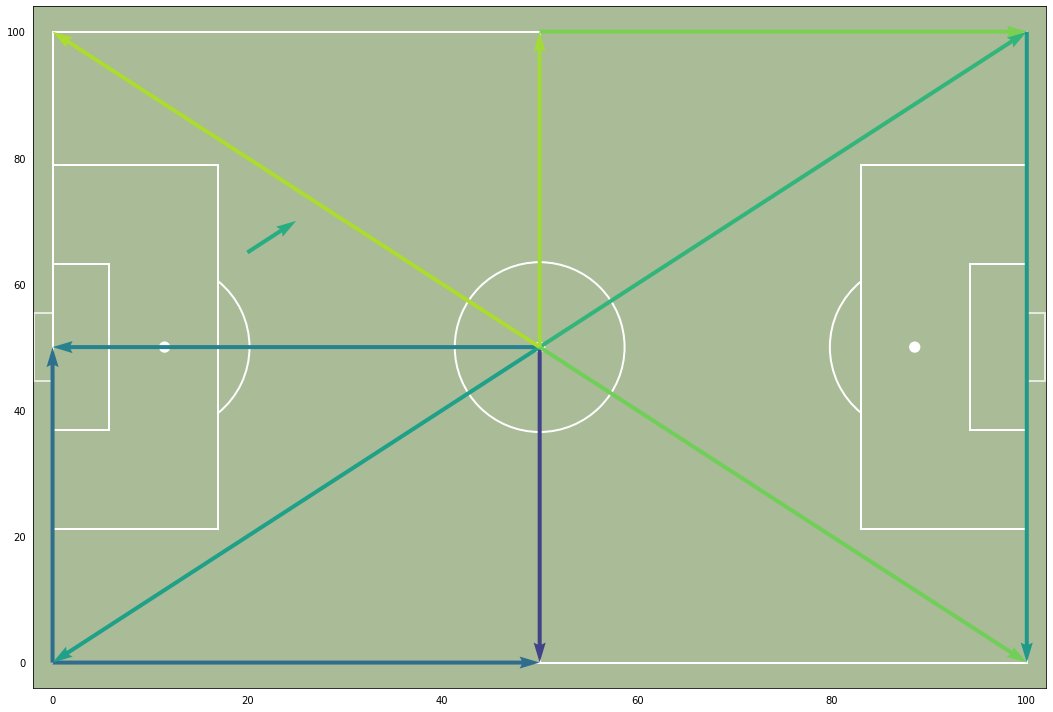

In [2]:
# generate data and color scheme
startx = np.array([0,0,50,50,50,50,50,50,50,50,100,20])
starty = np.array([0,0,50,50,50,50,50,50,50,100,100,65])
endx = startx + np.array([0,50,-50,0,50,-50,50,-50,0,50,0,5])
endy = starty + np.array([50,0,0,-50,50,-50,-50,50,50,0,-100,5])
color = [rgb2hex(plt.get_cmap('viridis')(idx)[:3]) for idx in np.random.uniform(size=12)]
# plot
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='full',layout=(1,1),figsize=(15,10),
              goal_type='box',linewidth=2,label=True,axis=True)
fig, ax = pitch.draw()
pitch.quiver(startx,starty,endx,endy,color=color,ax=ax)

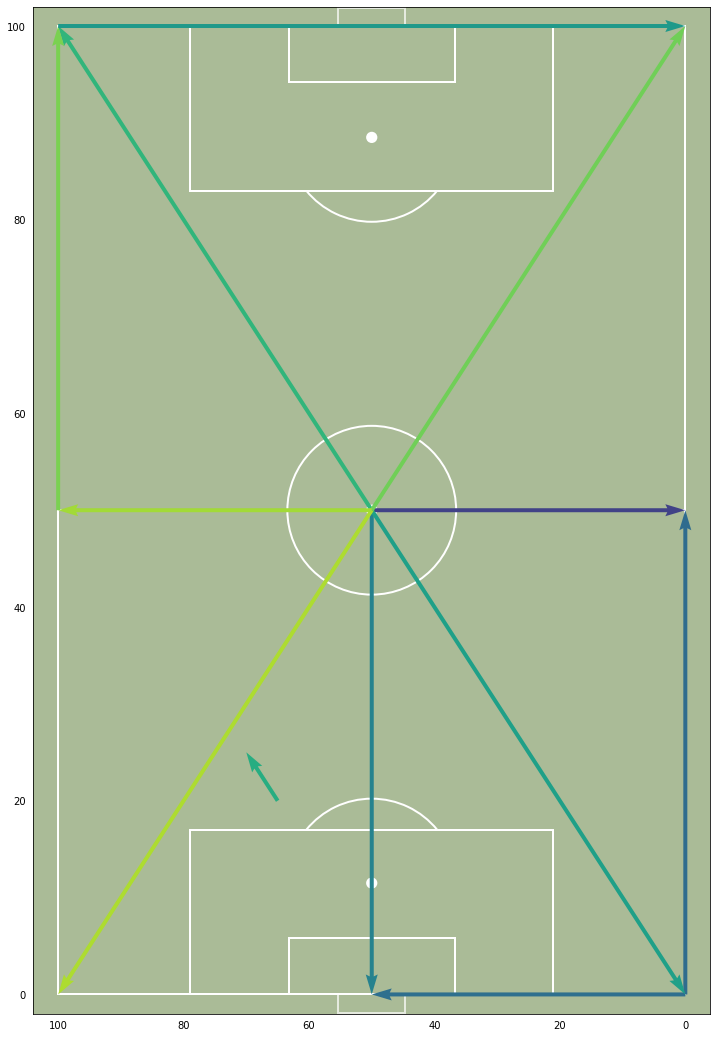

In [3]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='full',layout=(1,1),figsize=(10,15),
              goal_type='box',linewidth=2,label=True,axis=True)
fig, ax = pitch.draw()
pitch.quiver(startx,starty,endx,endy,color=color,ax=ax)

# Kernel density plot - heatmap

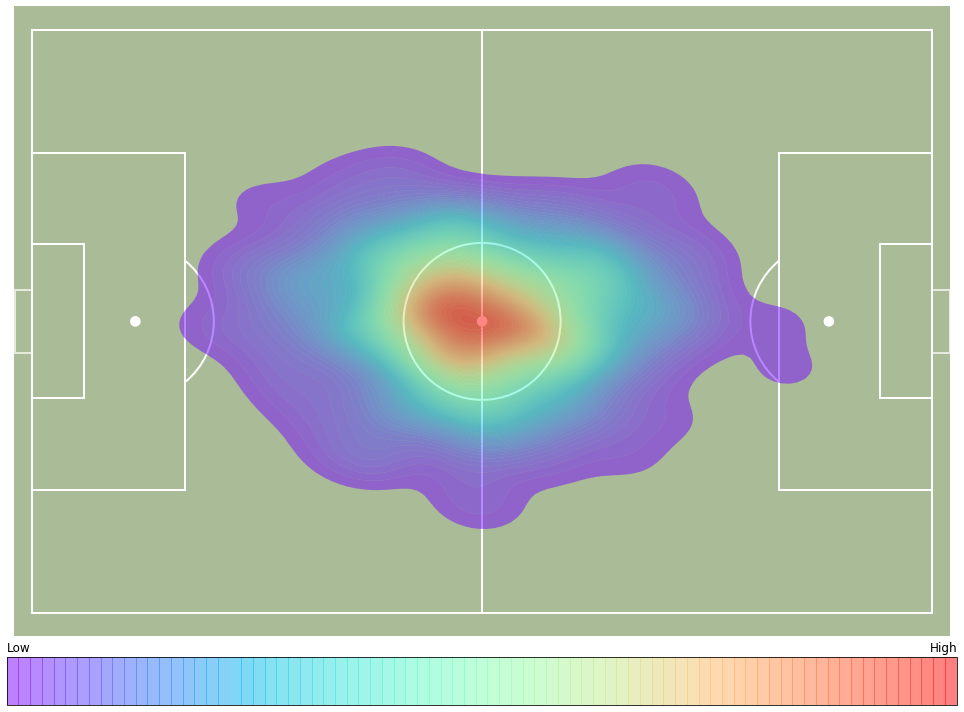

In [4]:
x1 = np.random.normal(loc=50, scale=10, size=500)
y1 = np.random.normal(loc=50, scale=10, size=500)
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='full',layout=(1,1),figsize=(15,10),
              goal_type='box',linewidth=2)
fig, ax = pitch.draw()
pitch.kdeplot(x1,y1,ax=ax,shade=True,cmap="rainbow",
              shade_lowest=False,n_levels=100,alpha=0.5,antialiased=True,cbar=True,
              cbar_kws={'orientation':'horizontal','use_gridspec':True,'fraction':0.068,'ticks':[],'pad':0.03},)              
fig.axes[1].set_title('Low',loc='left');
fig.axes[1].set_title('High',loc='right');

# Kernel density plot - contour map

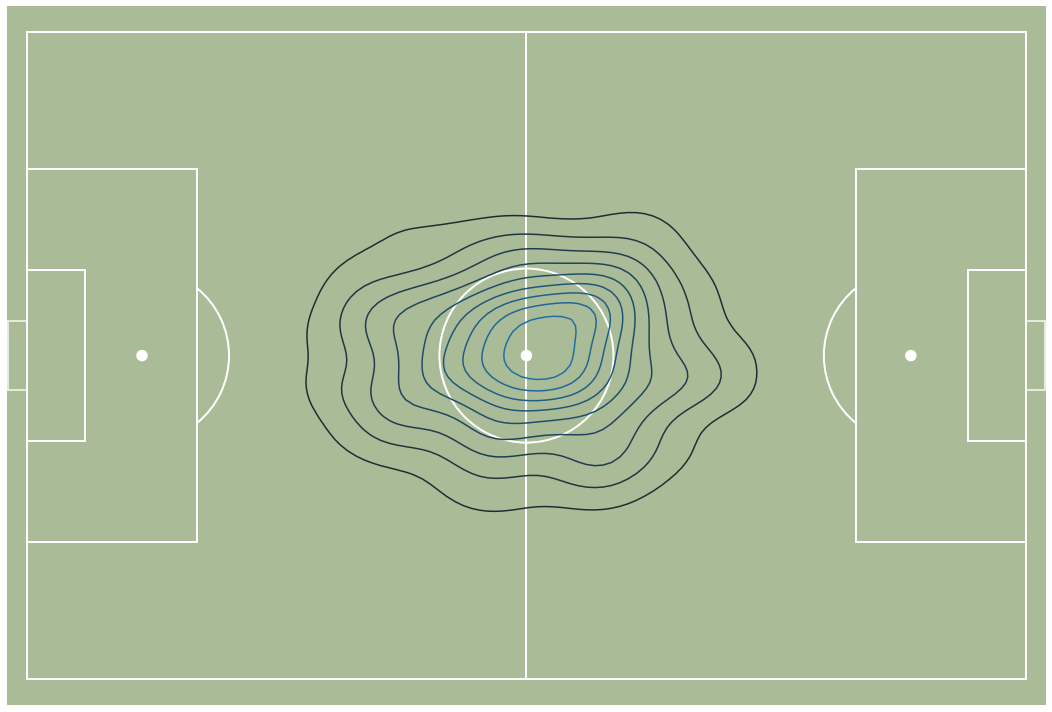

In [5]:
x1 = np.random.normal(loc=50, scale=10, size=500)
y1 = np.random.normal(loc=50, scale=10, size=500)
fig, ax = pitch.draw()
pitch.kdeplot(x1,y1,ax=ax)

# Shot map joint plot

In [6]:
x1 = np.random.normal(loc=90, scale=2, size=500)
y1 = np.random.normal(loc=50, scale=10, size=500)
scored = np.random.choice(a=[False, True], p=[0.9, 0.1],size=500)

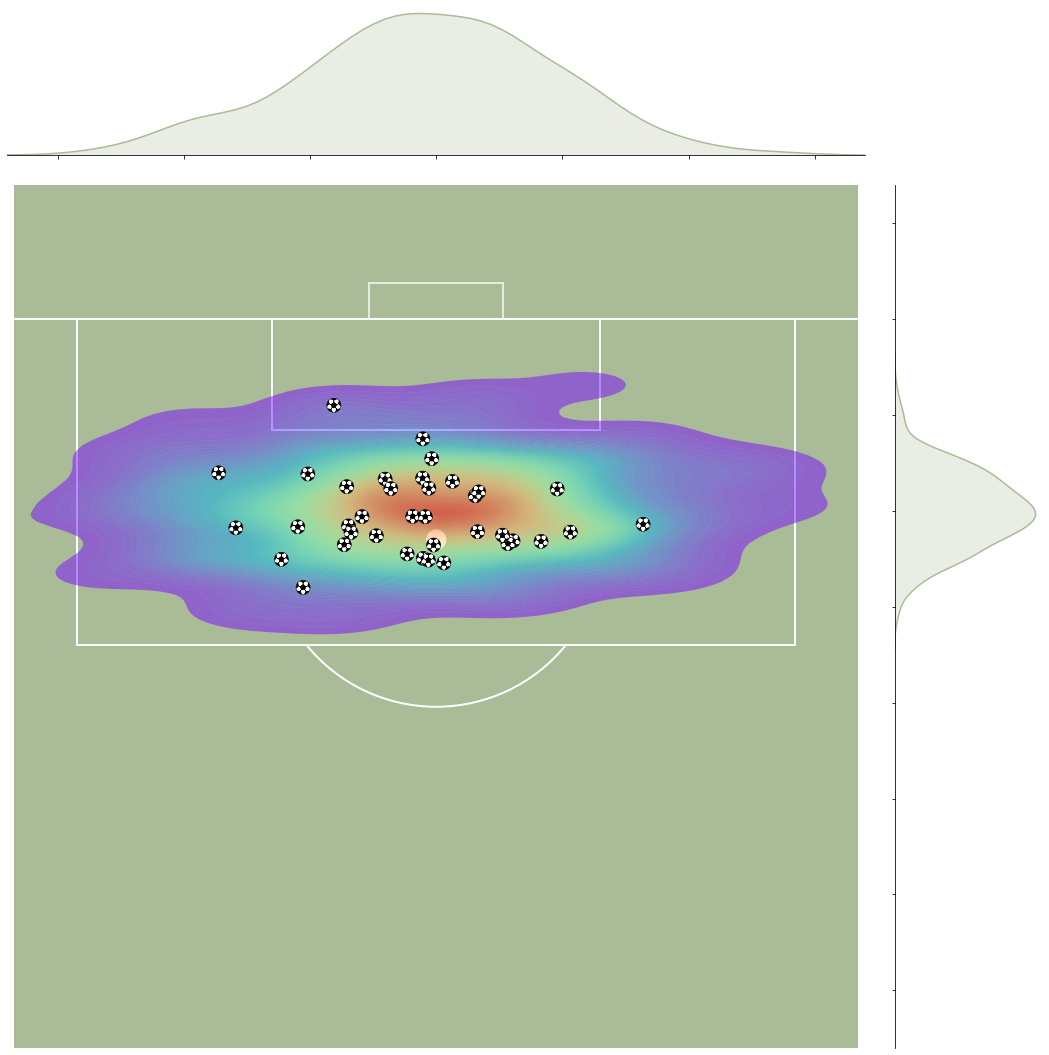

In [7]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='half',layout=(1,1),figsize=(10,15),
              goal_type='box',linewidth=2,pad_bottom=-20,pad_top=12,pad_left=-16,pad_right=-16,)
joint_kws = {'shade':True, 'color':pitch.pitch_color,'cmap':"rainbow",
             'shade_lowest':False,'n_levels':100,'alpha':0.5,'antialiased':True}
joint_plot = pitch.jointplot(x1,y1,kind='kde',**joint_kws)
pitch.scatter(x1[scored],y1[scored], marker='football',s=200,alpha=1,ax=joint_plot.ax_joint)

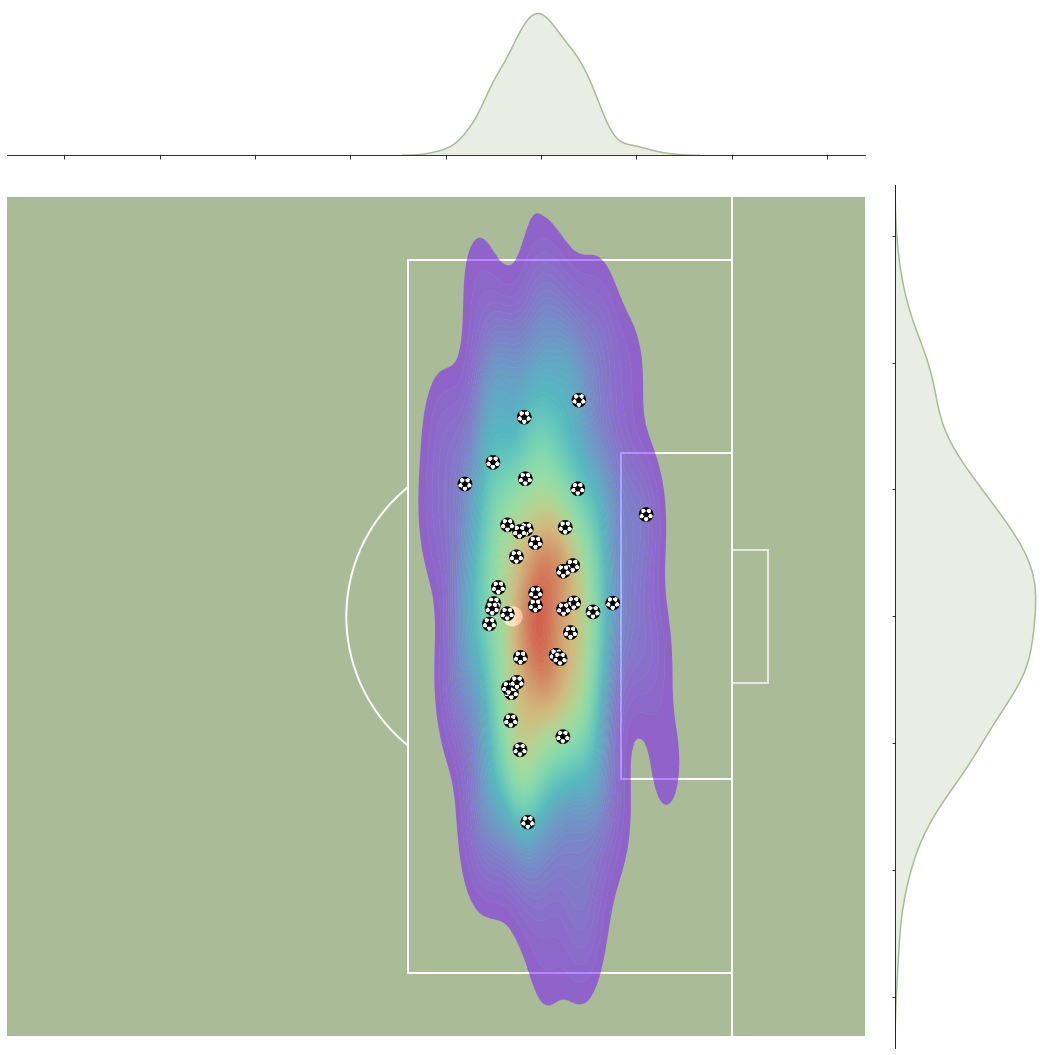

In [8]:
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='half',layout=(1,1),figsize=(10,15),
              goal_type='box',linewidth=2,pad_left=-20,pad_right=12,pad_bottom=-16,pad_top=-16,)
joint_plot = pitch.jointplot(x1,y1,kind='kde',**joint_kws)
pitch.scatter(x1[scored],y1[scored], marker='football',s=200,alpha=1,ax=joint_plot.ax_joint)

# Hexbin

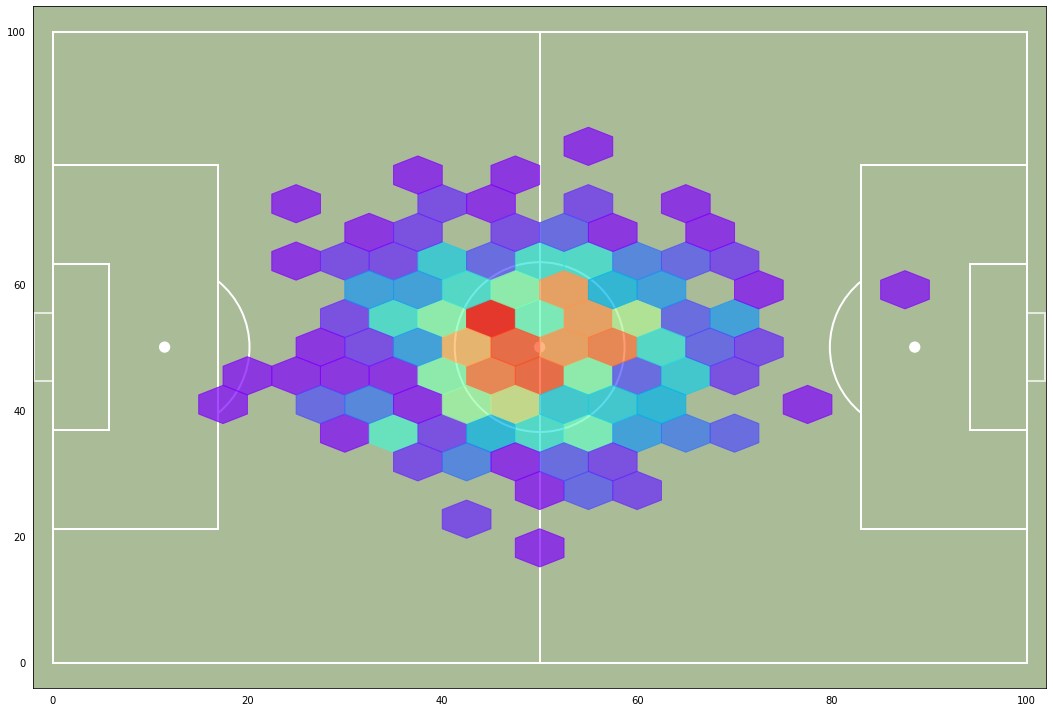

In [9]:
x1 = np.random.normal(loc=50, scale=10, size=500)
y1 = np.random.normal(loc=50, scale=10, size=500)
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='full',layout=(1,1),figsize=(15,10),
              goal_type='box',linewidth=2,axis=True,label=True)
fig, ax = pitch.draw()
pitch.hexbin(x1,y1,ax=ax,alpha=0.7)

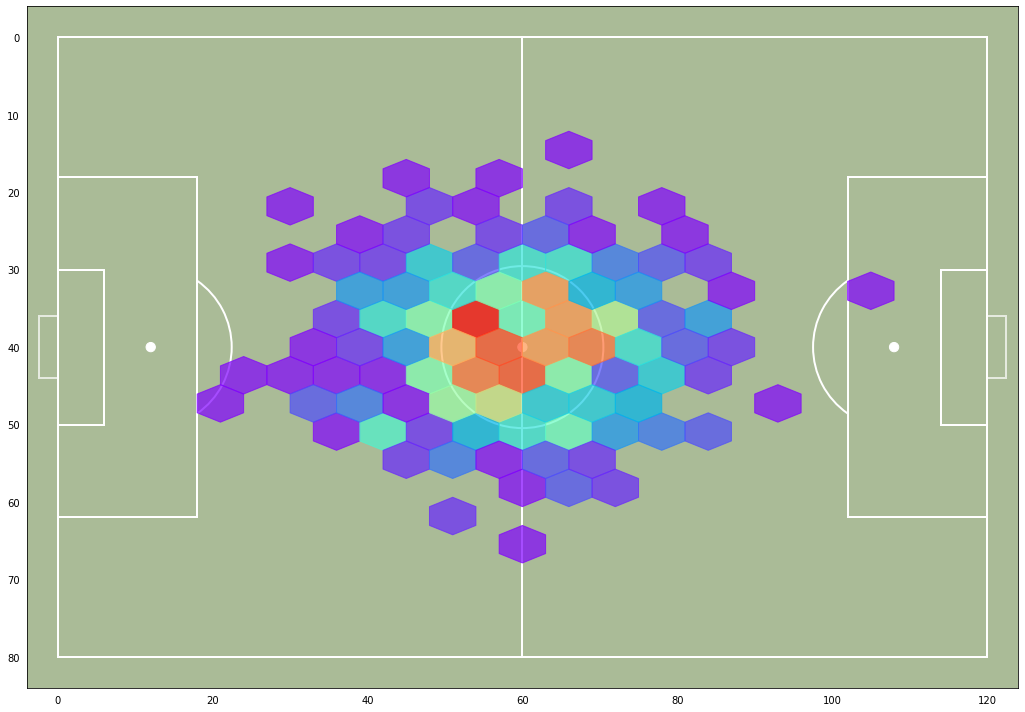

In [10]:
# convert to statsbomb coordinates to check
x1 = x1/100*120
y1 = np.abs(y1-100)/100*80
pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='full',layout=(1,1),figsize=(15,10),
              goal_type='box',linewidth=2,axis=True,label=True)
fig, ax = pitch.draw()
pitch.hexbin(x1,y1,ax=ax,alpha=0.7)

# Plot footballs

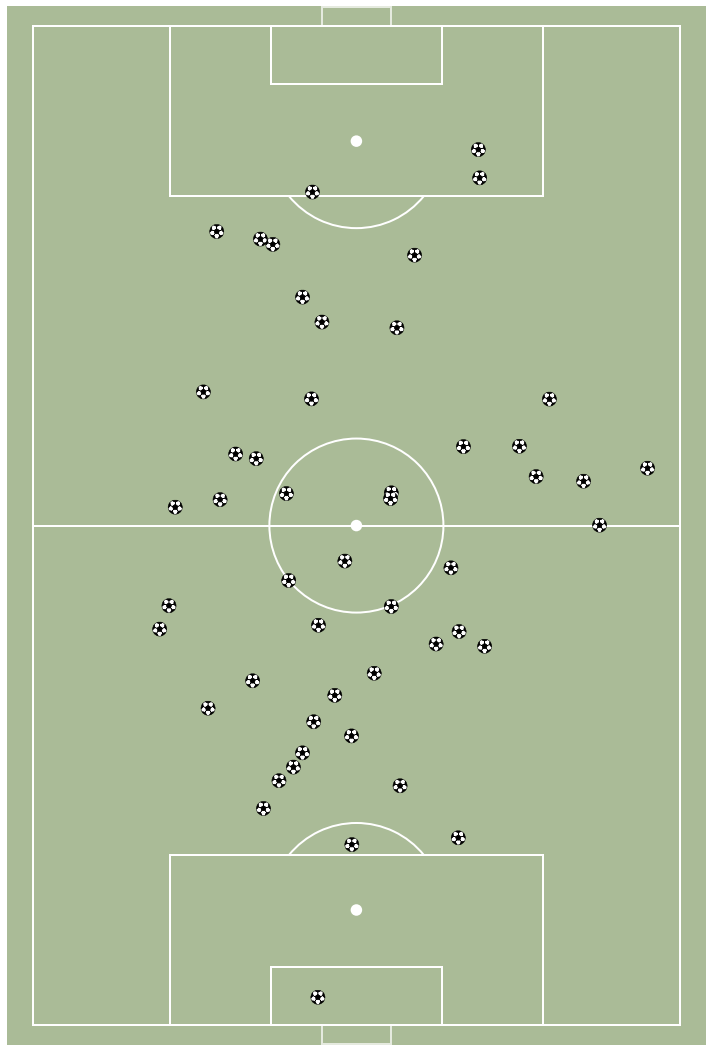

In [11]:
N = 50
x1 = np.random.normal(loc=50, scale=20, size=N)
y1 = np.random.normal(loc=50, scale=20, size=N)
pitch = Pitch(pitch_type='opta',orientation='vertical',view='full',layout=(1,1),figsize=(10,15),
              goal_type='box',linewidth=2)
fig,ax = pitch.draw()
pitch.scatter(x1,y1, marker='football',s=200,alpha=1,ax=ax)

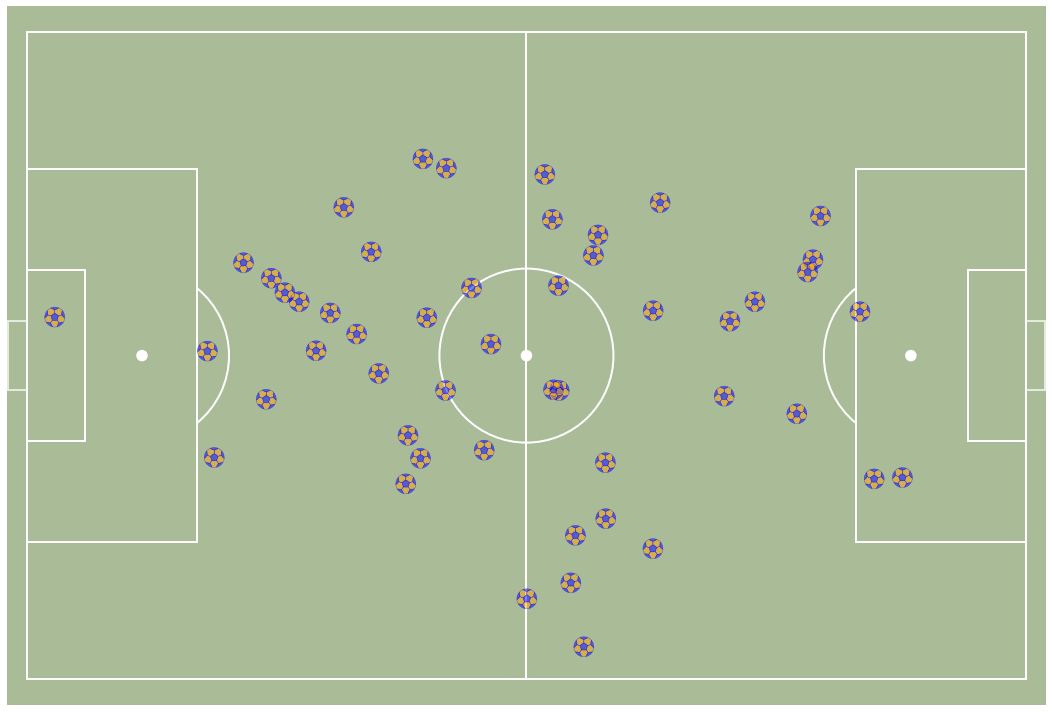

In [12]:
# facecolor is the color of the hexagons, edgecolor is the color of the pentagons
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='full',layout=(1,1),figsize=(15,10),
              goal_type='box',linewidth=2)
fig,ax = pitch.draw()
pitch.scatter(x1,y1, marker='football',c='orange',edgecolors='blue',alpha=0.5,ax=ax)

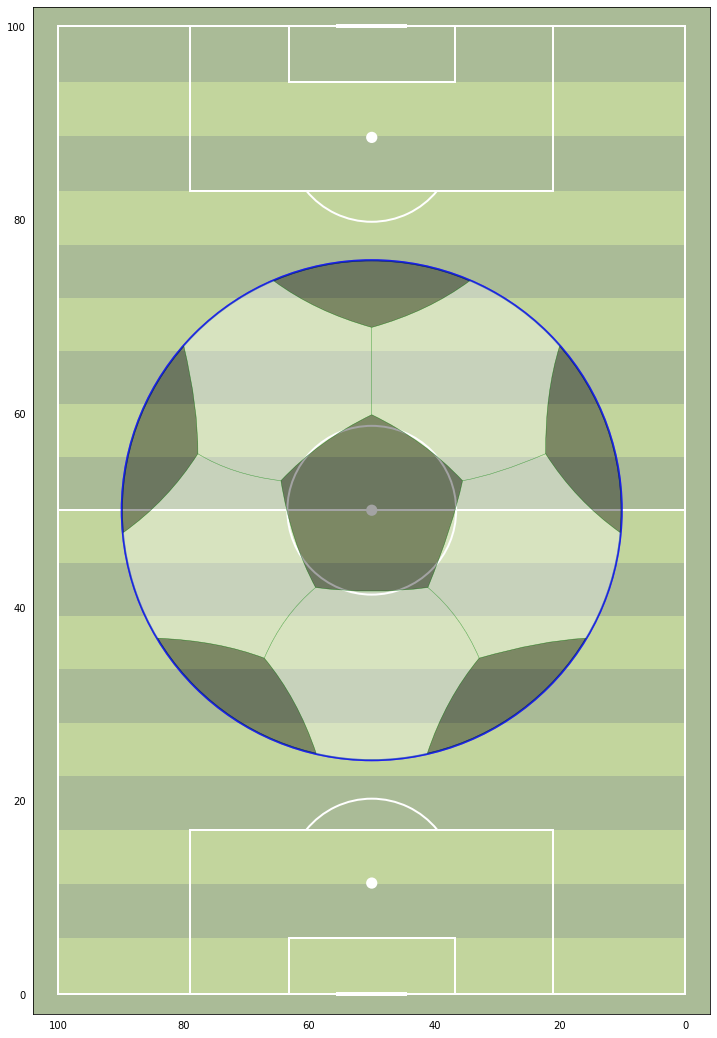

In [13]:
# check football markers are approximately the same size as a circle marker
x1 = np.array([50,50])
y1 = np.array([50,50])
markersize = 500
pitch = Pitch(pitch_type='opta',orientation='vertical',view='full',figsize=(10,15),stripe=True,
              goal_type='line',axis=True,label=True)
fig,ax = pitch.draw()
pitch.scatter(x1,y1, marker='o',facecolor='None',edgecolor='blue',linewidths=2,alpha=0.6,s=markersize**2,ax=ax)
pitch.scatter(x1,y1, marker='football',edgecolor='green',alpha=0.2,s=markersize**2,ax=ax)

# Opta xA style plot

In [14]:
# generate data
size = 30
lower, upper = 0, 100
mu, sigma = 92, 5
X = truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
mu, sigma = 50, 9
Y = truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
x = X.rvs(size)
y = Y.rvs(size)
assist = np.random.choice(np.array([True,False]),size=size,p=np.array([0.4,0.6]))
xassist = x[assist]
yassist = y[assist]
xother = x[~assist]
yother = y[~assist]
x1 = np.random.normal(loc=60, scale=12, size=1000)
spare = np.random.uniform(50,100,size=1000)
x1[x1>100] = spare[x1>100]
x1[x1<0] = spare[x1<0]
y1 = np.random.normal(loc=50, scale=30, size=1000)
y1[y1>100] = spare[y1>100]
y1[y1<0] = spare[y1<0]
x_pass_start = np.array([65,80])
x_pass_end = np.array([90,97])
y_pass_start = np.array([80,20])
y_pass_end = np.array([50,45])

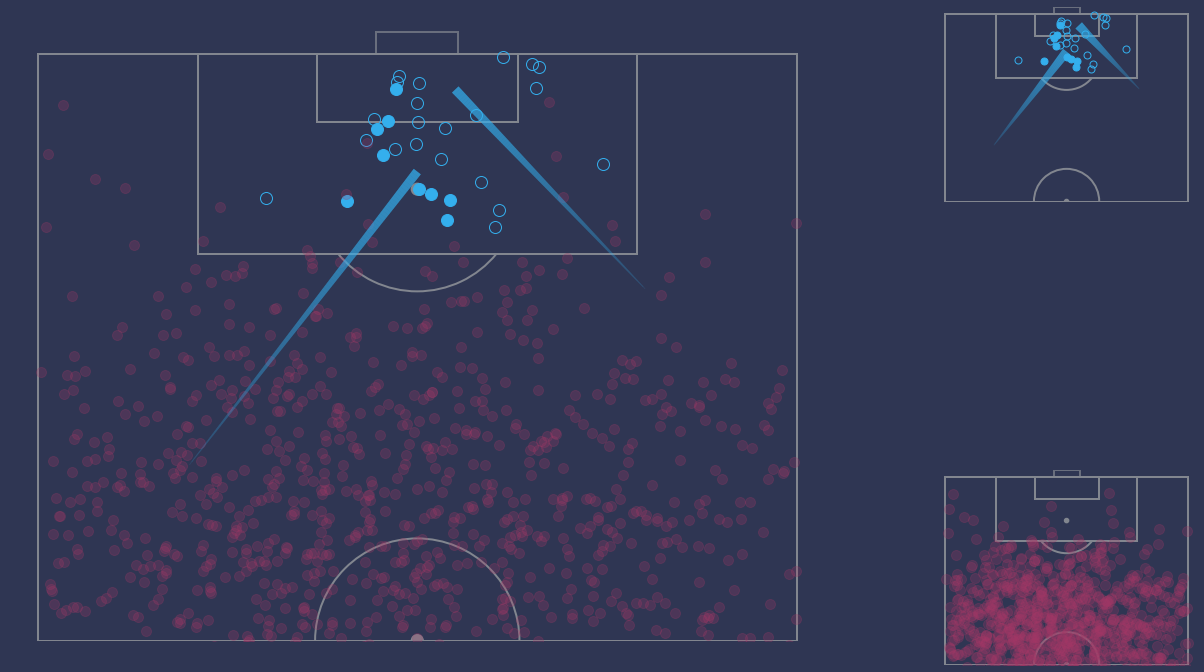

In [15]:
pad = 1/72
figsize1 = 1536/72
figsize2 = 1125/72
fig = plt.figure(figsize=(figsize1, figsize2),facecolor='#2f3653') 
gs = gridspec.GridSpec(2, 2, width_ratios=[3.13, 1])
ax1 = plt.subplot(gs[:, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 1])
pitch = Pitch(pitch_type='opta',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),
              pitch_color='#2f3653',line_color='#82868f',goal_type='box',linewidth=2,
              pad_bottom=0.2,pad_top=4)
pitch.draw(ax1)
pitch.draw(ax2)
pitch.draw(ax3)
pitch.lines(x_pass_start,y_pass_start,x_pass_end,y_pass_end,lw=9,transparent=True,comet=True,zorder=3,ax=ax1)
pitch.lines(x_pass_start,y_pass_start,x_pass_end,y_pass_end,lw=9,transparent=True,comet=True,zorder=3,ax=ax2)
pitch.plot(xassist,yassist, marker='o', color='None',markersize=12,markerfacecolor='#34afed',
           linestyle='None',markeredgecolor='#34afed',ax=ax1)
pitch.plot(xother,yother, marker='o', color='None',markersize=12,linestyle='None',markeredgecolor='#34afed',ax=ax1)
pitch.plot(xassist,yassist, marker='o', color='None',markersize=7,markerfacecolor='#34afed',
           linestyle='None',markeredgecolor='#34afed',ax=ax2)
pitch.plot(xother,yother, marker='o', color='None',markersize=7,linestyle='None',markeredgecolor='#34afed',ax=ax2)
pitch.plot(x1,y1, marker='o', color='#a43967',markersize=10,alpha=0.25,linestyle='None',ax=ax1)
pitch.plot(x1,y1, marker='o', color='#a43967',markersize=10,alpha=0.25,linestyle='None',ax=ax3)

# Statsbomb type xg plot

In [16]:
# generate data
x = np.random.gamma(90, 1.1, 50)
x[x>120] = 110
y = np.random.normal(loc=40, scale=12, size=50)

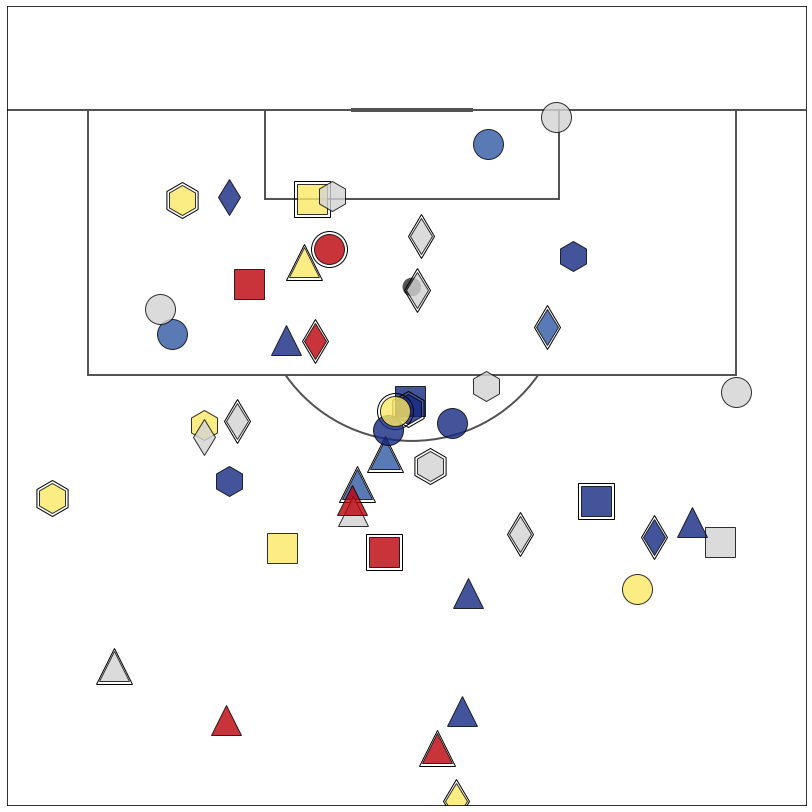

In [17]:
figsize = 820/72
pad = 1/72
markers = ['s','h','d','^','o']
marker_type = np.random.choice(markers,size=50)
colors = ['#152982','#2f59a1','#fce865','#d3d3d3','#bc010a']
color_type = np.random.choice(colors,50)
goal_type = np.random.choice([True,False],50)
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='half',layout=(1,1),pitch_color='white',
              line_color='#535353',figsize=(figsize,figsize),goal_type='line',axis=True,tight_layout=True,
              pad_left=-12.51,pad_right=-13.25,pad_bottom=-12.82,pad_top=7.06)
fig, ax = pitch.draw()
for i in range(5):
    marker = markers[i]
    x_marker = x[marker_type==marker]
    y_marker = y[marker_type==marker]
    color_marker = color_type[marker_type==marker]
    goal_marker = goal_type[marker_type==marker]
    x_marker_goal = x_marker[goal_marker]
    y_marker_goal = y_marker[goal_marker]
    if marker == 'd':
        markersize = 25
    else:
        markersize = 30
    pitch.plot(x_marker_goal, y_marker_goal,marker=marker, markersize=markersize+6,
                  markerfacecolor="None",markeredgecolor='black',linestyle='None',linewidth=1,ax=ax)
    for color in colors:
        x_marker_color = x_marker[color_marker==color]
        y_marker_color = y_marker[color_marker==color]
        pitch.plot(x_marker_color,y_marker_color, marker=marker, c=color,markersize=markersize,
                      markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

# Statsbomb

In [18]:
# generate data
x = np.random.gamma(90, 1.1, 50)
x[x>120] = 110
y = np.random.normal(loc=40, scale=12, size=50)

#### Statsbomb vertical full

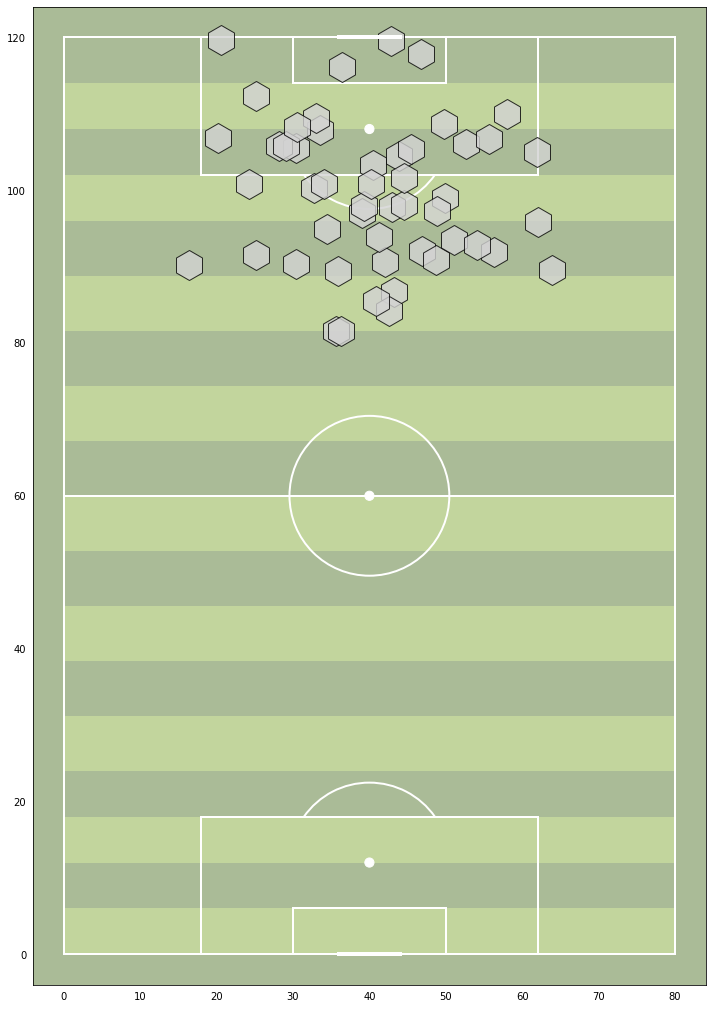

In [19]:
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='full',figsize=(10,15),stripe=True,
              goal_type='line',axis=True,label=True)
fig,ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30, markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Statsbomb horizontal full

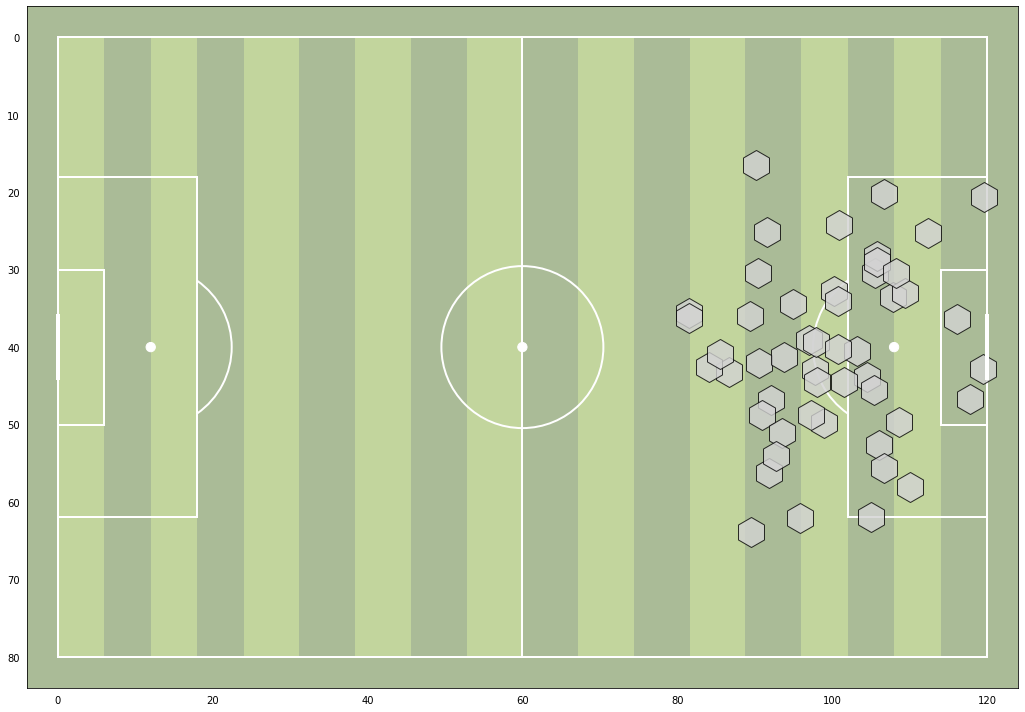

In [20]:
pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='full',figsize=(15,10),stripe=True,
              goal_type='line',
              axis=True,label=True)
fig,ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Statsbomb Horizontal half

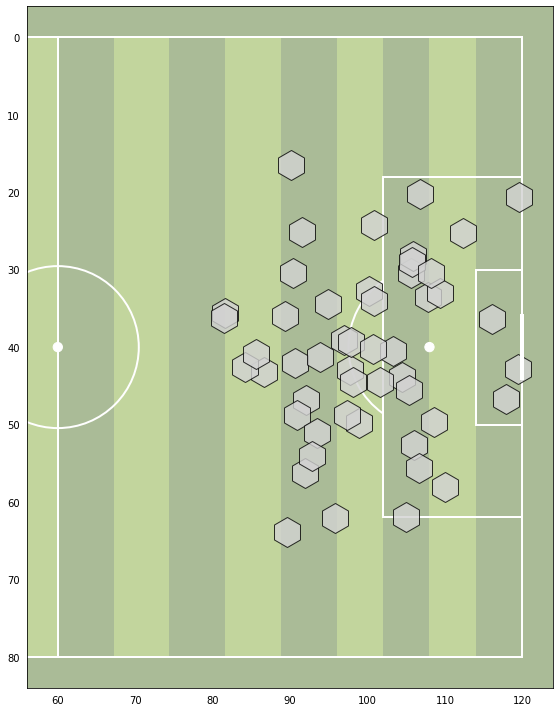

In [21]:
pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='half',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig,ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Statsbomb Vertical half

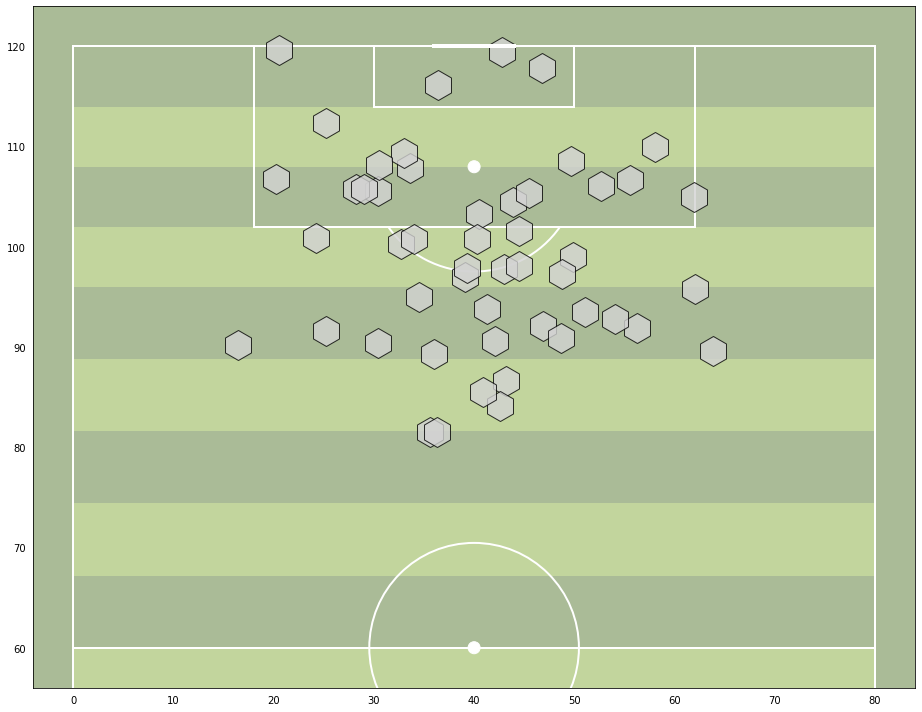

In [22]:
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='half',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig,ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

# Opta

In [23]:
# generate data
x = np.random.gamma(75, 1.1, 50)
x[x>100] = 90
y = np.random.normal(loc=50, scale=12, size=50)

#### Opta vertical full

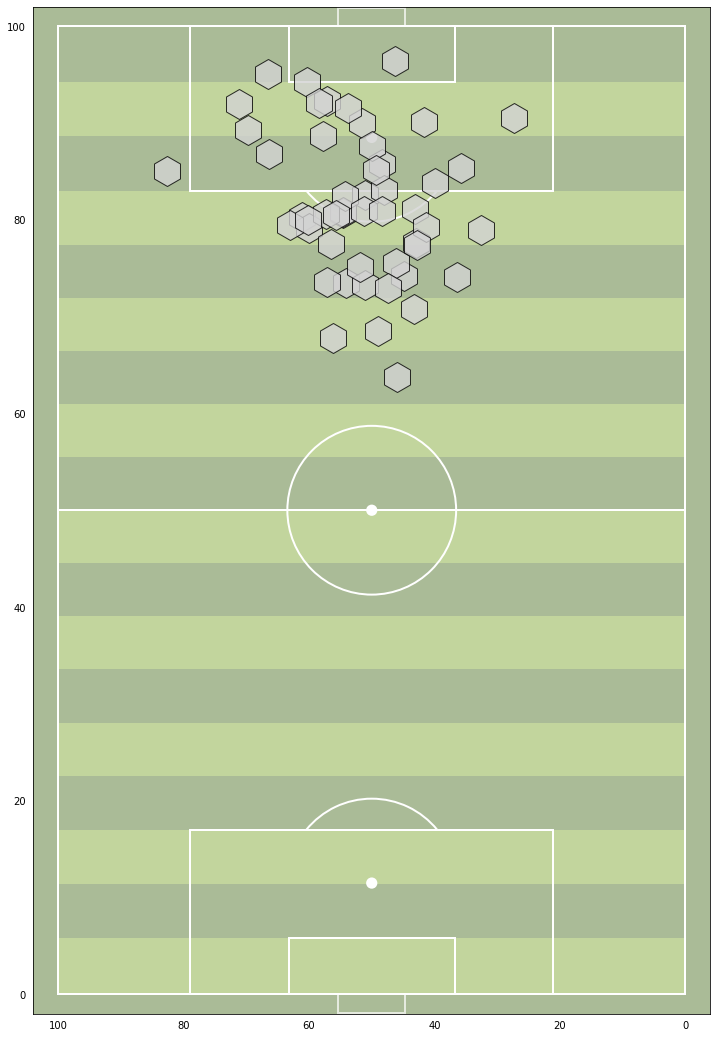

In [24]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='full',layout=(1,1),figsize=(10,15),stripe=True,
              goal_type='box',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Opta horizontal full

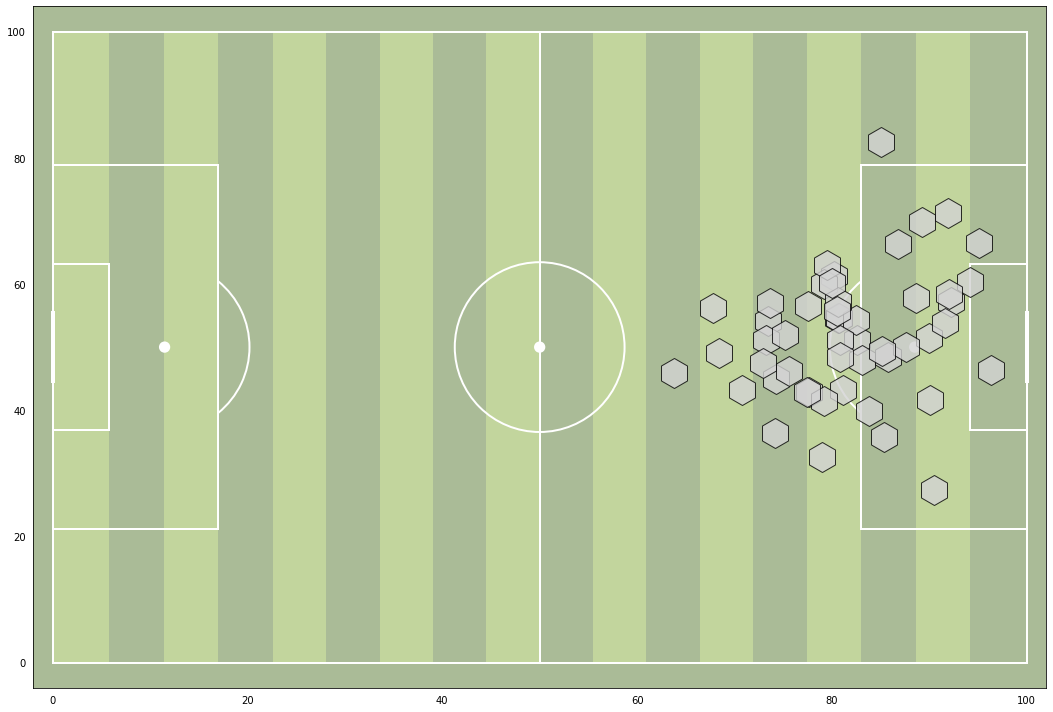

In [25]:
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='full',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Opta vertical half

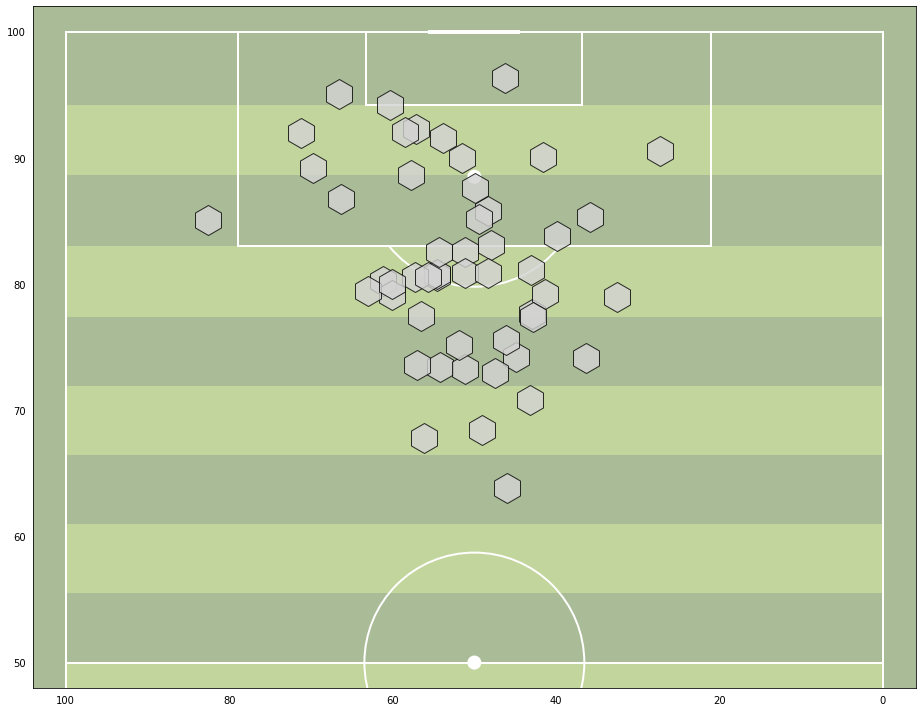

In [26]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='half',layout=(1,1),figsize=(15,10),stripe=True,goal_type='line',
              axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Opta Horizontal half

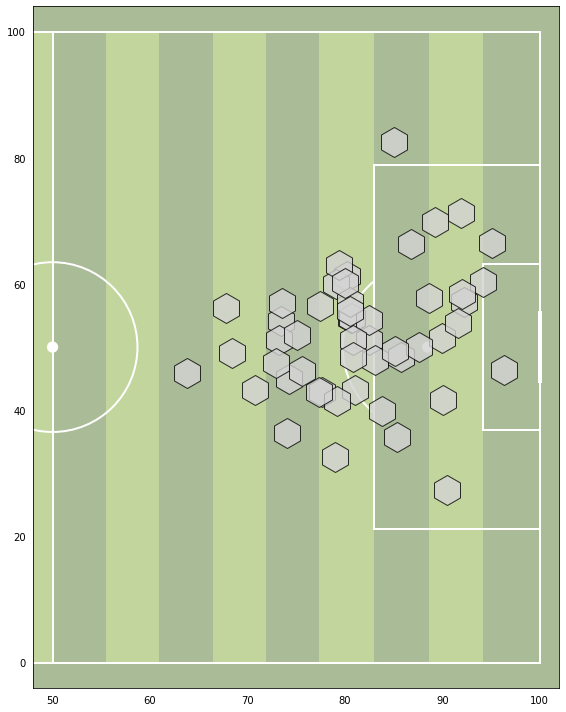

In [27]:
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='half',layout=(1,1),figsize=(15,10),stripe=True,goal_type='line',
              axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

# Tracab

In [28]:
# generate data
x = np.random.normal(loc=3600, scale=700, size=50)
x[x>5250] = 4500
y = np.random.normal(loc=0, scale=1000, size=50)

#### Tracab vertical full

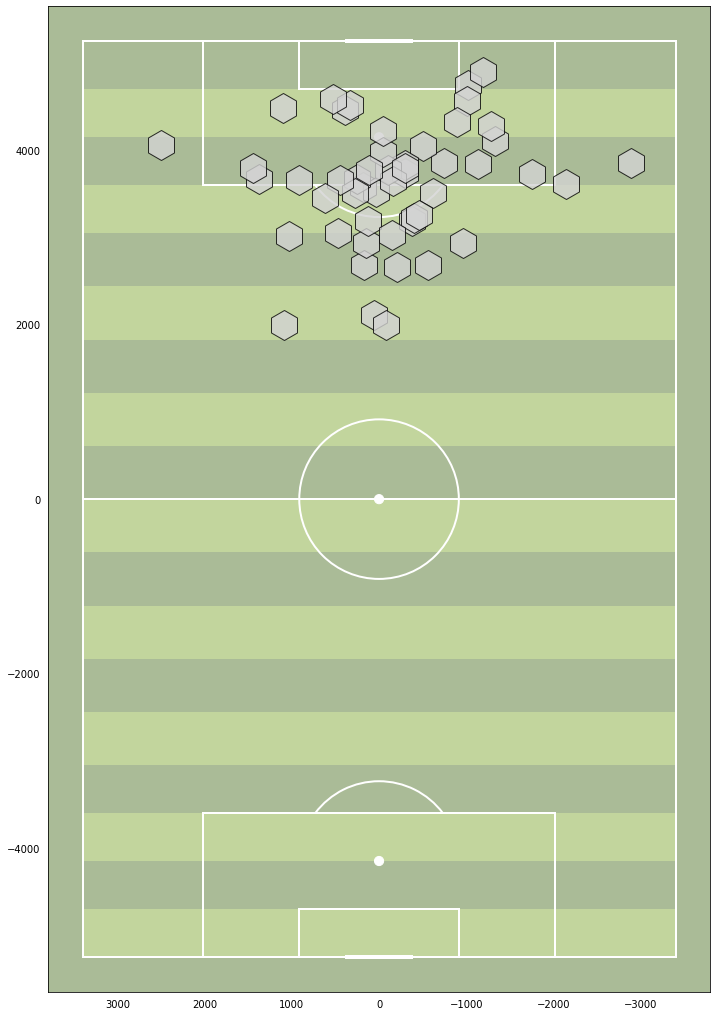

In [29]:
pitch = Pitch(pitch_type='tracab',orientation='vertical',view='full',layout=(1,1),figsize=(10,15),
              pitch_width=68,pitch_length=105,stripe=True,goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Tracab horizontal full

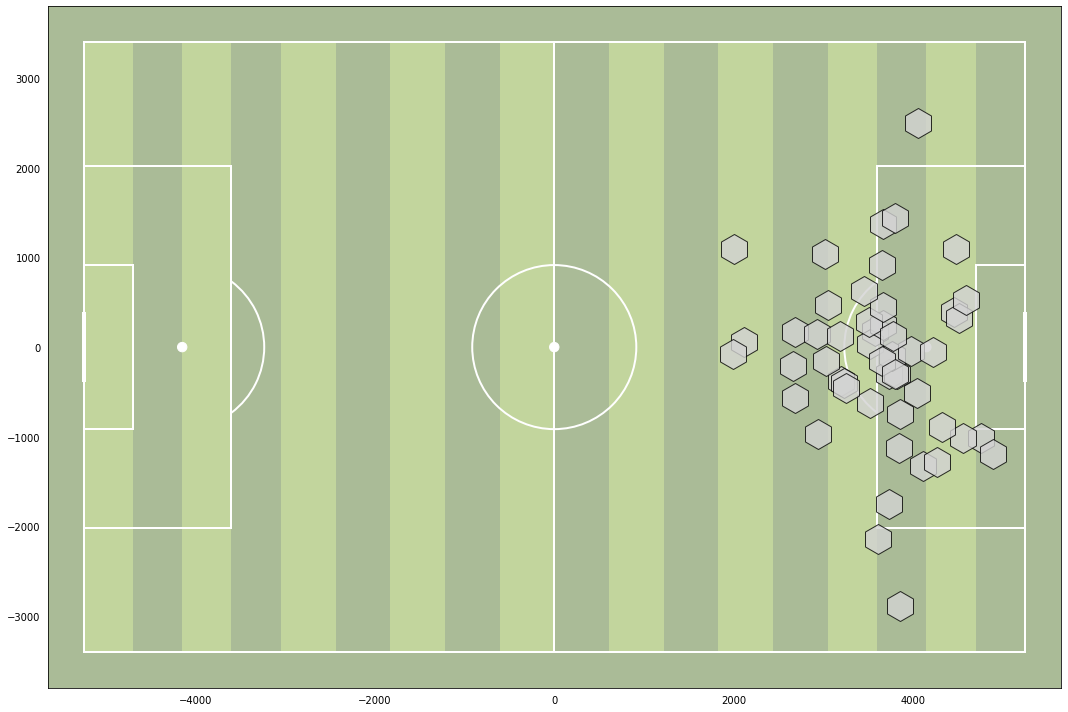

In [30]:
pitch = Pitch(pitch_type='tracab',orientation='horizontal',view='full',layout=(1,1),figsize=(15,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Tracab vertical half

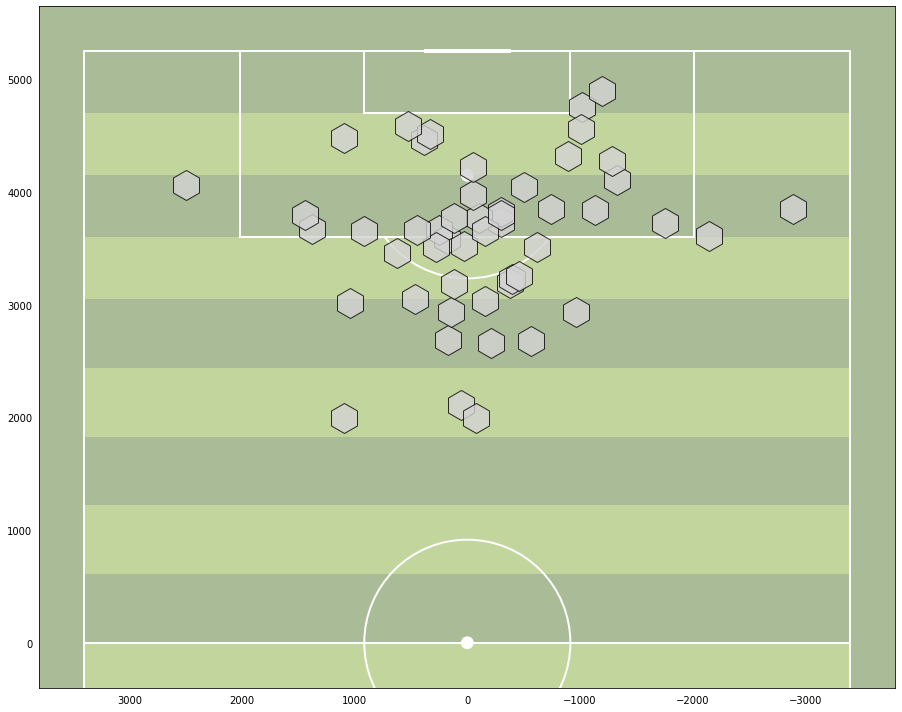

In [31]:
pitch = Pitch(pitch_type='tracab',orientation='vertical',view='half',layout=(1,1),figsize=(15,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### Tracab Horizontal half

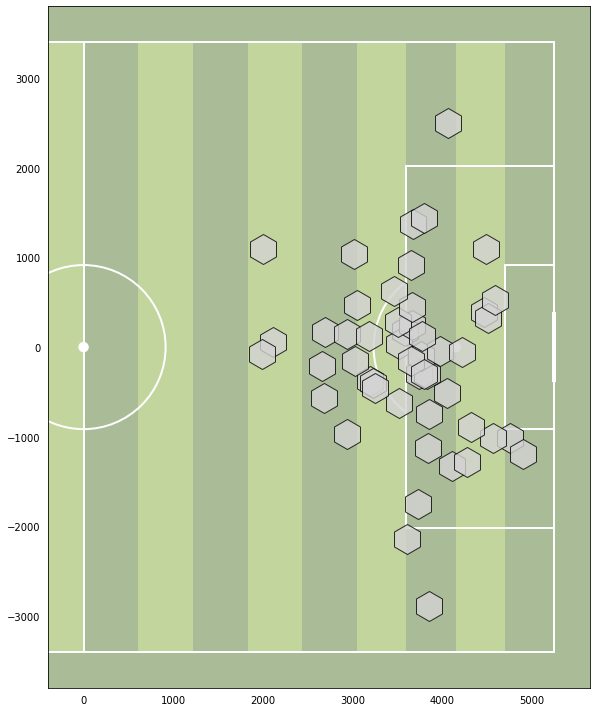

In [32]:
pitch = Pitch(pitch_type='tracab',orientation='horizontal',view='half',layout=(1,1),figsize=(15,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

# Stats.com

In [33]:
# generate data
x = np.random.gamma(75, 1.1, 50)
x[x>100] = 90
y = np.random.normal(loc=35, scale=12, size=50)

#### stats.com vertical full

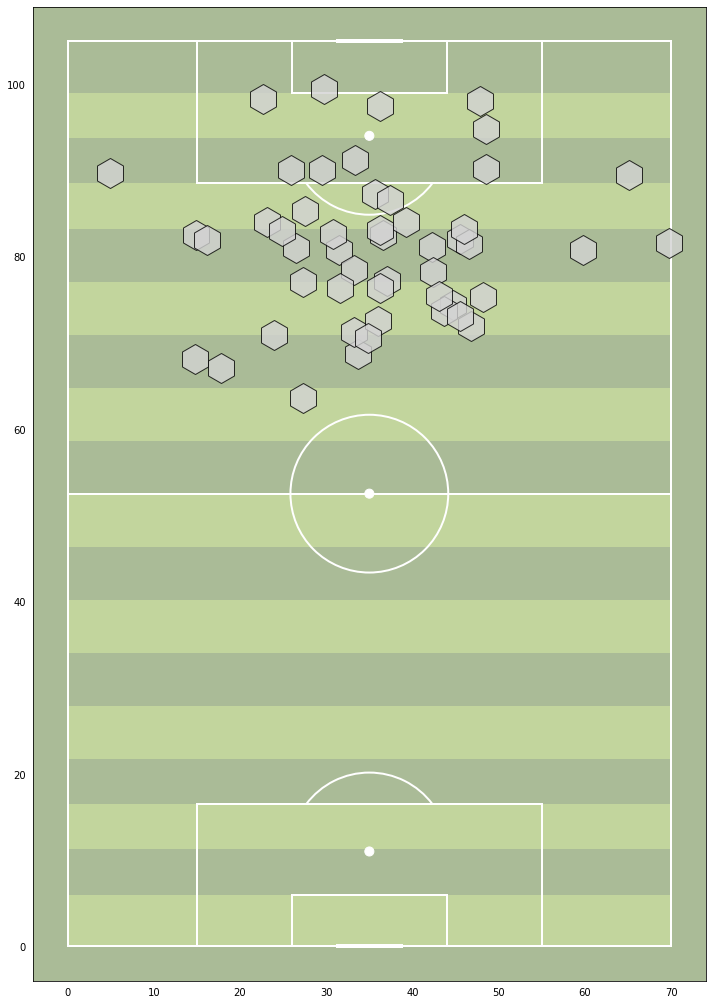

In [34]:
pitch = Pitch(pitch_type='stats',orientation='vertical',view='full',figsize=(10,15),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### stats.com horizontal full

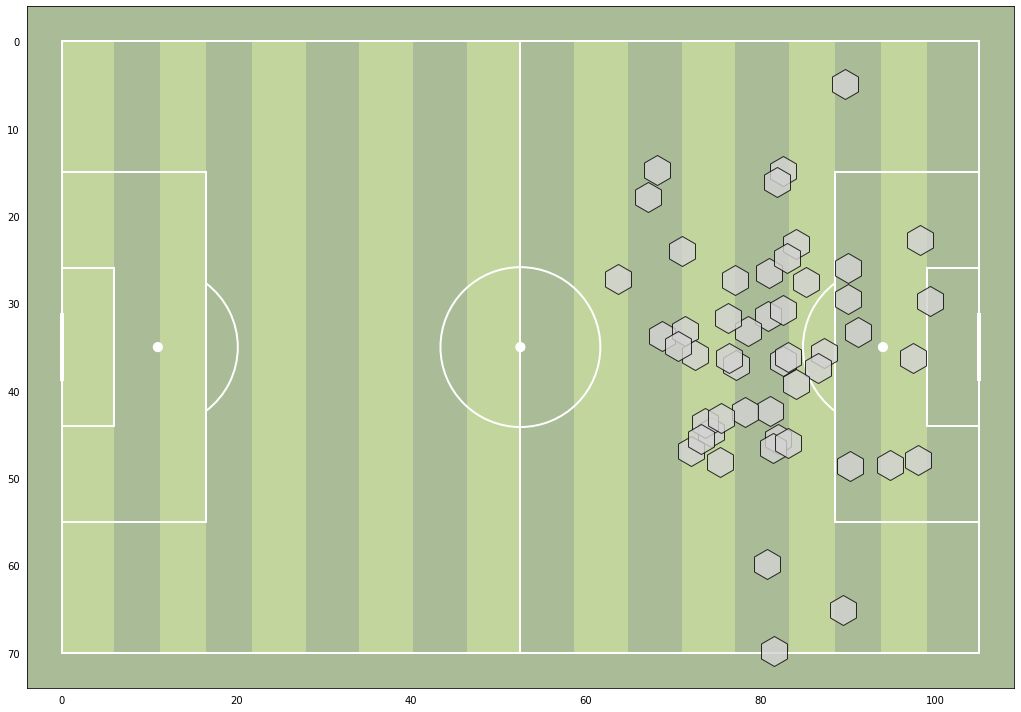

In [35]:
pitch = Pitch(pitch_type='stats',orientation='horizontal',view='full',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### stats.com vertical half

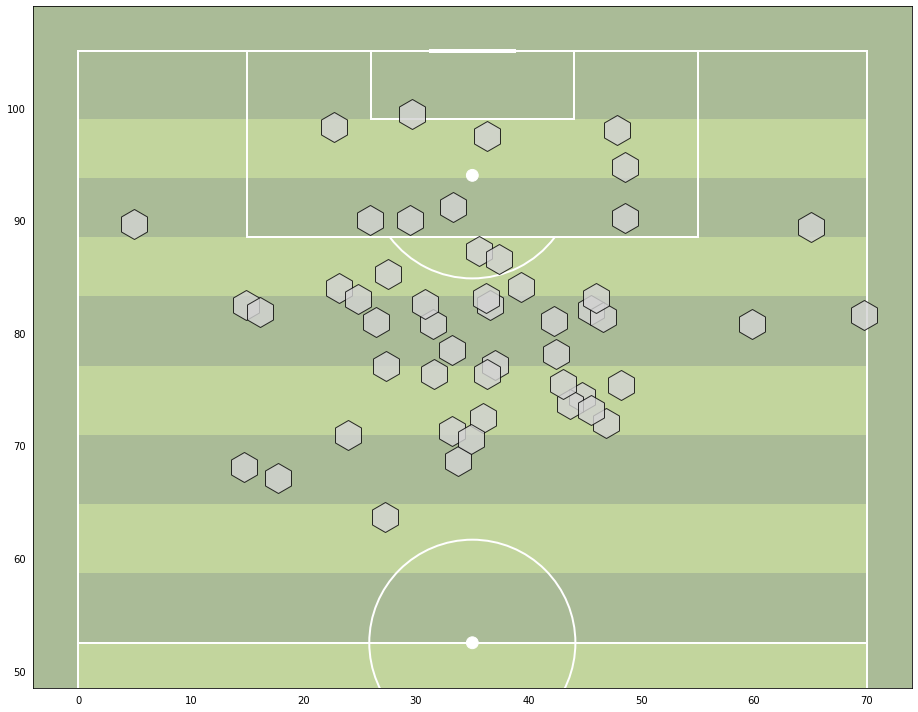

In [36]:
pitch = Pitch(pitch_type='stats',orientation='vertical',view='half',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### stats.com Horizontal half

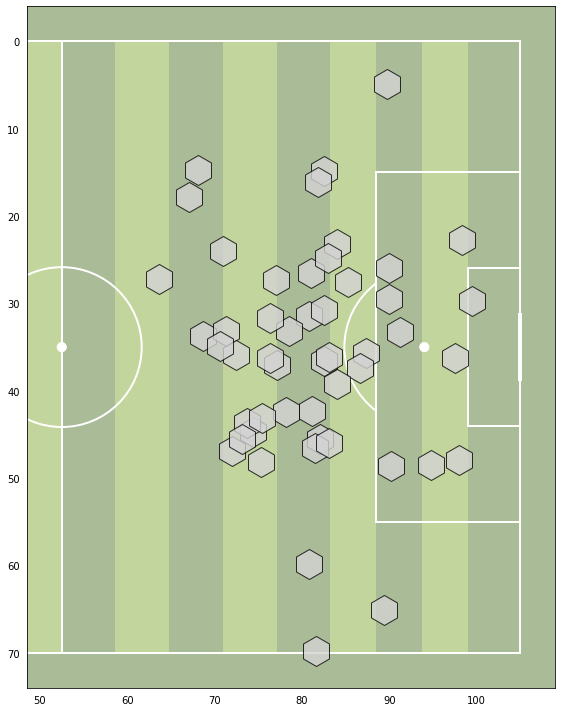

In [37]:
pitch = Pitch(pitch_type='stats',orientation='horizontal',view='half',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

# Wyscout

In [38]:
# generate data
x = np.random.gamma(75, 1.1, 50)
x[x>100] = 90
y = np.random.normal(loc=50, scale=12, size=50)

#### wyscout vertical full

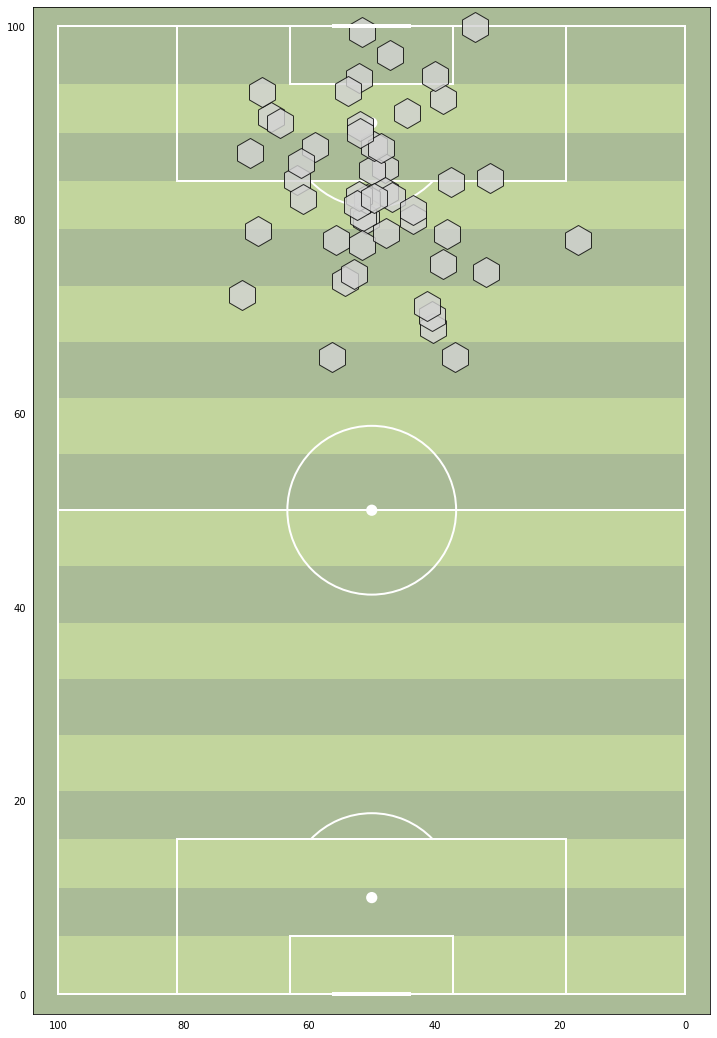

In [39]:
pitch = Pitch(pitch_type='wyscout',orientation='vertical',view='full',figsize=(10,15),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### wyscout horizontal full

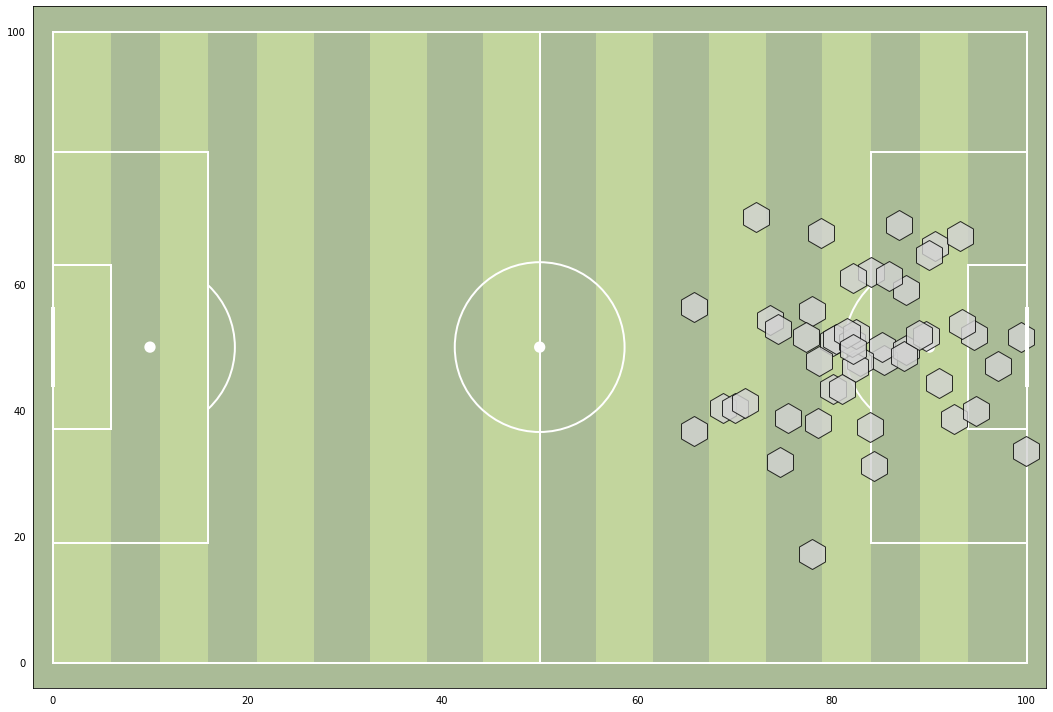

In [40]:
pitch = Pitch(pitch_type='wyscout',orientation='horizontal',view='full',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### wyscout vertical half

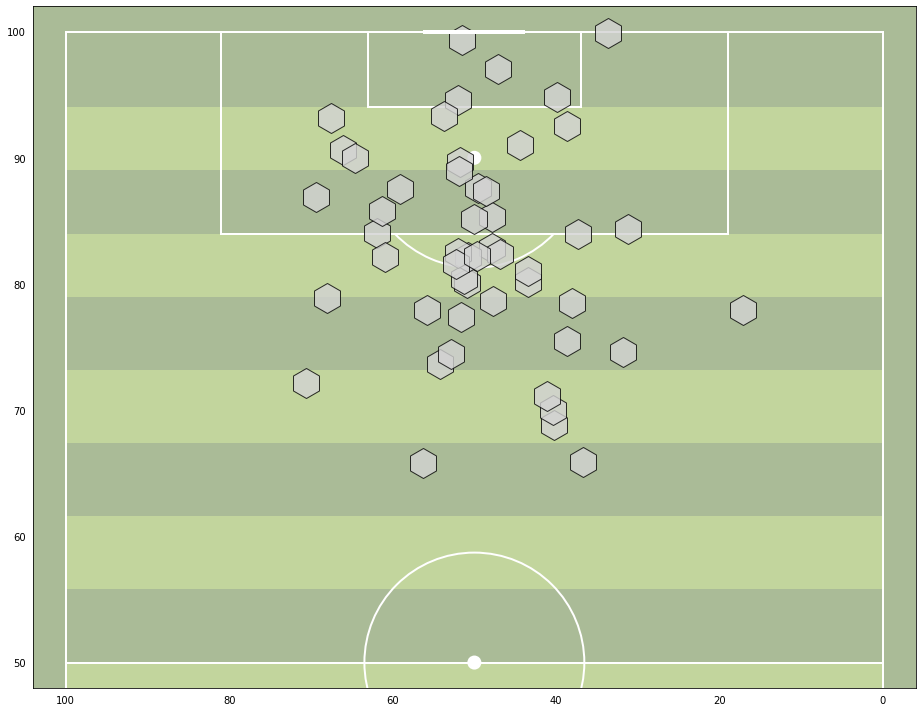

In [41]:
pitch = Pitch(pitch_type='wyscout',orientation='vertical',view='half',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### wyscout Horizontal half

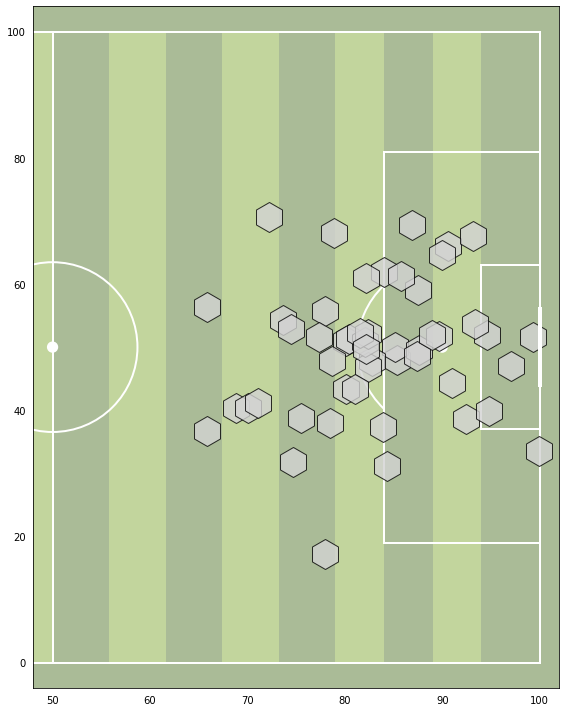

In [42]:
pitch = Pitch(pitch_type='wyscout',orientation='horizontal',view='half',layout=(1,1),figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

# Statsperform

In [43]:
# generate data
x = np.random.gamma(75, 1.1, 50)
x[x>105] = 90
y = np.random.normal(loc=34, scale=10, size=50)

#### statsperform vertical full

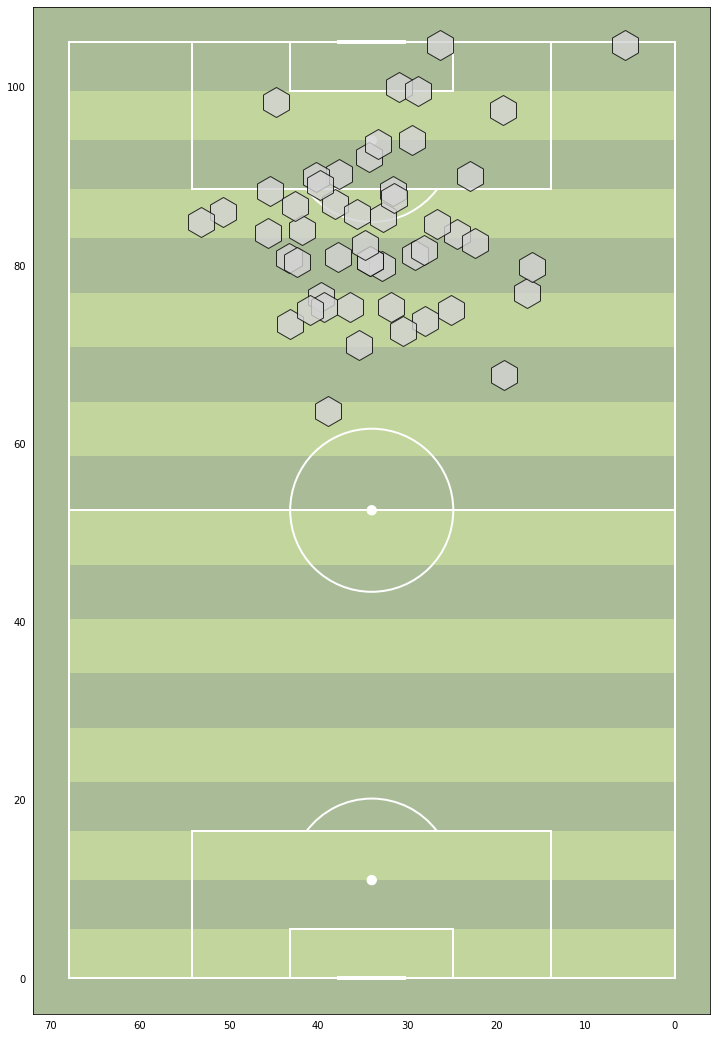

In [44]:
pitch = Pitch(pitch_type='statsperform',orientation='vertical',view='full',figsize=(10,15),stripe=True,
              goal_type='line',axis=True,label=True)
fig,ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30, markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### statsperform horizontal full

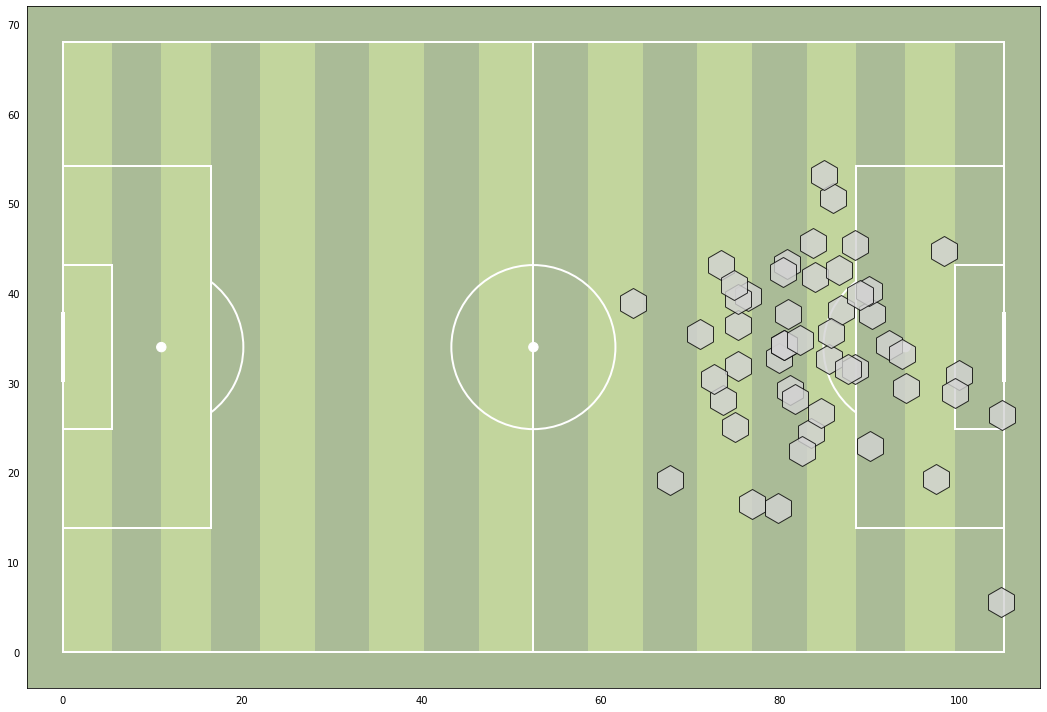

In [45]:
pitch = Pitch(pitch_type='statsperform',orientation='horizontal',view='full',layout=(1,1),
              figsize=(15,10),stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### statsperform vertical half

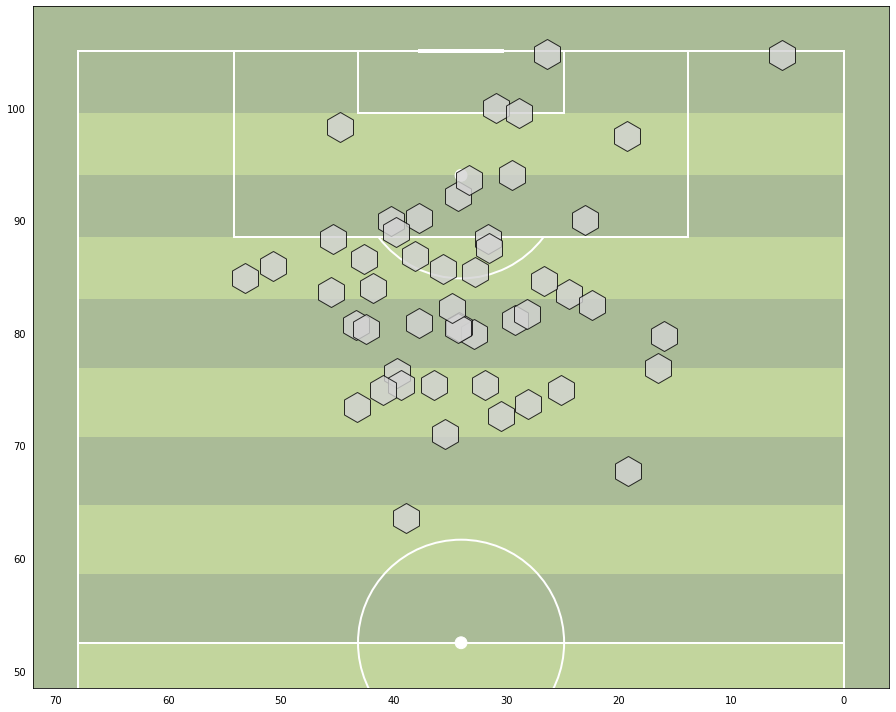

In [46]:
pitch = Pitch(pitch_type='statsperform',orientation='vertical',view='half',layout=(1,1),figsize=(15,10),
              stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

#### statsperform horizontal half

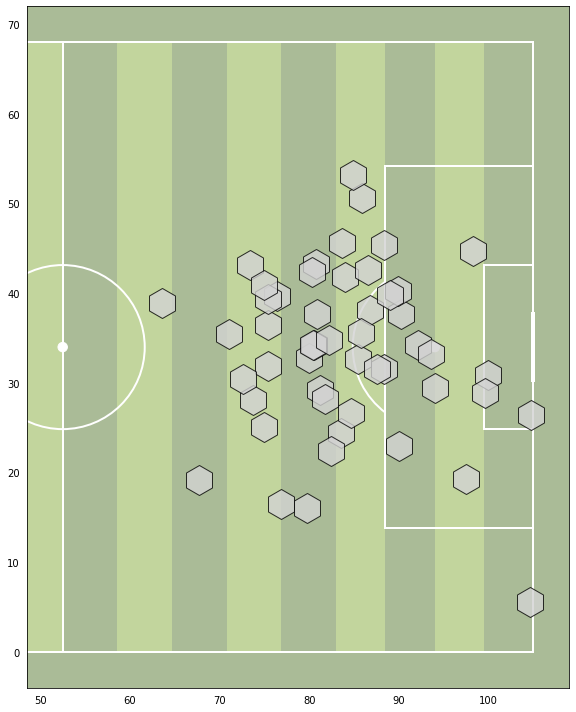

In [47]:
pitch = Pitch(pitch_type='statsperform',orientation='horizontal',view='half',layout=(1,1),figsize=(15,10),
              stripe=True,
              goal_type='line',axis=True,label=True)
fig, ax = pitch.draw()
pitch.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax)

# Plot multiple

In [48]:
# generate data
x = np.random.gamma(90, 1.1, 50)
x[x>120] = 110
y = np.random.normal(loc=40, scale=12, size=50)

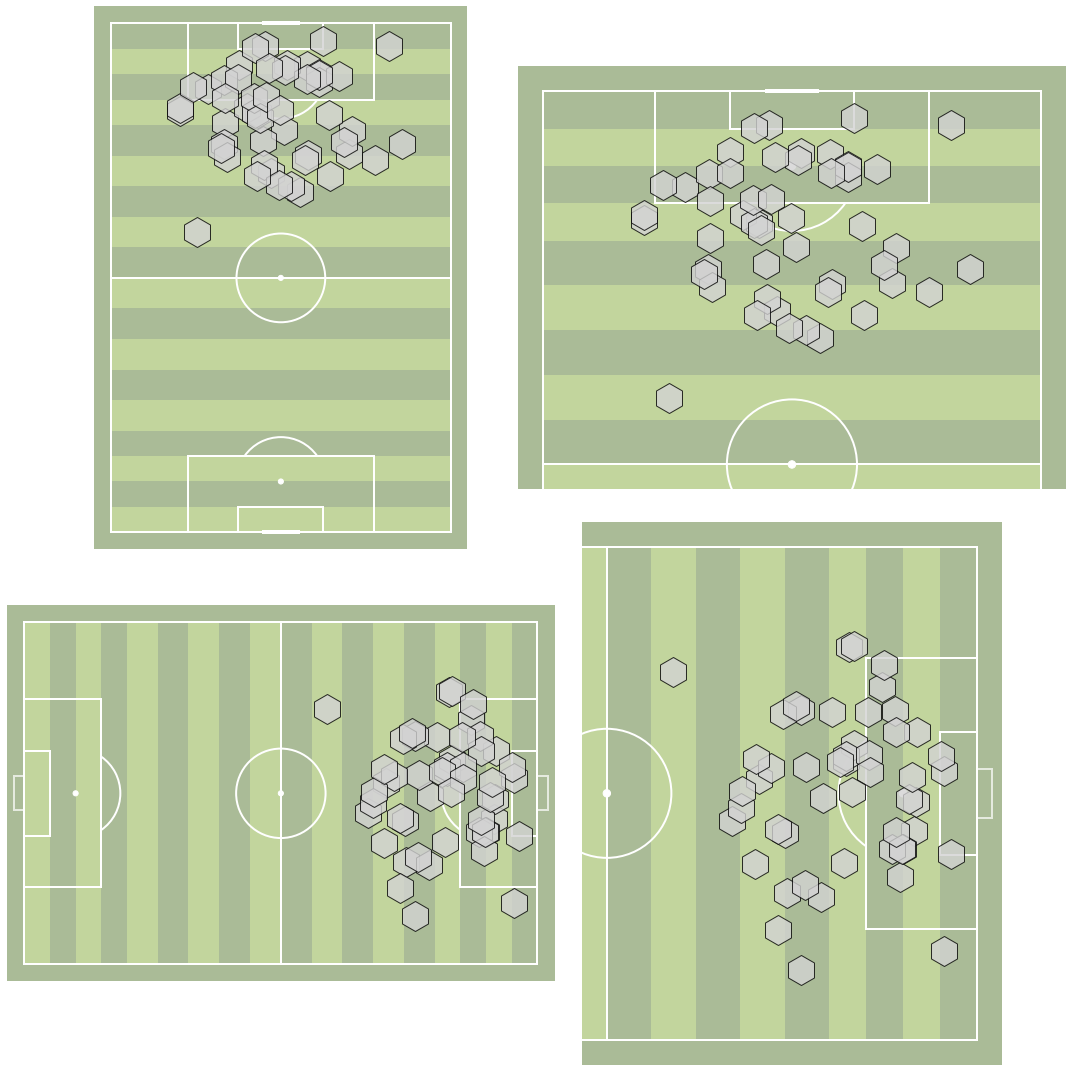

In [49]:
pitch_vf = Pitch(pitch_type='statsbomb',orientation='vertical',view='full', goal_type='line',stripe=True)
pitch_vh = Pitch(pitch_type='statsbomb',orientation='vertical',view='half', goal_type='line',stripe=True)
pitch_hf = Pitch(pitch_type='statsbomb',orientation='horizontal',view='full', goal_type='box',stripe=True)
pitch_hh = Pitch(pitch_type='statsbomb',orientation='horizontal',view='half', goal_type='box',stripe=True)
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,15))
pitch_vf.draw(ax[0,0])
pitch_vh.draw(ax[0,1])
pitch_hf.draw(ax[1,0])
pitch_hh.draw(ax[1,1])
pitch_vf.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax[0,0])
pitch_vh.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax[0,1])
pitch_hf.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax[1,0])
pitch_hh.plot(x,y, marker='h', color='#d3d3d3',markersize=30,markeredgecolor='black',alpha=0.8,linestyle='None',ax=ax[1,1])
fig.set_tight_layout(True)